# Forum Group Discussion MK Praktikum Unggulan (Praktikum DGX)
---
Forum Group Discussion ini dilaksanakan sebagai wadah diskusi peserta untuk mendalami materi yang berkaitan dengan MK Praktikum Unggulan (Praktikum DGX), guna mendukung pemahaman konsep, analisis permasalahan, serta penerapan materi sesuai dengan ruang lingkup program studi.

# Hands-On Prediksi Harga Tiket Pesawat
---
Hands-on ini bertujuan untuk membangun sebuah proyek machine learning yang mampu memprediksi harga tiket pesawat berdasarkan data historis penerbangan menggunakan algoritma Linear Regression. Informasi yang digunakan meliputi maskapai penerbangan, tanggal perjalanan, waktu keberangkatan, waktu kedatangan, durasi penerbangan, jumlah transit, serta jarak tempuh penerbangan. Proyek ini dirancang mengikuti metodologi CRISP-DM agar proses pengembangan model dilakukan secara sistematis, terstruktur, dan mudah dievaluasi.

## Tujuan

Setelah menyelesaikan Hands-on ini, diharapkan peserta  dapat:

* Memahami dan menerapkan alur pengembangan proyek data science menggunakan metodologi CRISP-DM.
* Melakukan eksplorasi, pembersihan, dan transformasi data penerbangan secara sistematis dan terstruktur.
* Membangun dan mengevaluasi algoritma Linear Regression untuk prediksi harga tiket pesawat.
* Menganalisis performa model prediksi menggunakan metrik evaluasi regresi (MAE, RMSE, dan R²).

<a id='home'></a>
<h2>Daftar Isi</h2>

- <a href=#CRISP_DM>CRISP-DM</a>
- <a href=#Business>Business Understanding</a>
- <a href=#Understanding>Data Understanding</a>
- <a href=#Preparation>Data Preparation</a>
- <a href=#Modelling>Modelling</a>
- <a href=#Evaluation>Evaluation Model</a>
- <a href=#Deployment>Deployment</a>

<a id='CRISP_DM'></a>
# CRISP-DM
<hr>
Cross Industry Standard Process for Data Mining (CRISP-DM) merupakan metodologi yang digunakan dalam pengembangan proyek data mining dan machine learning. Metodologi ini terdiri dari enam tahapan utama, yaitu:

* Business Understanding
* Data Understanding
* Data Preparation
* Modelling
* Evaluation
* Deployment

Setiap tahapan dalam CRISP-DM saling berkaitan dan bersifat iteratif, sehingga memungkinkan penyesuaian pada tahap sebelumnya apabila ditemukan kendala atau insight baru pada tahap selanjutnya.

<a id='Business'></a>
# Business Understanding
<hr>

## Latar Belakang
Industri penerbangan merupakan salah satu sektor transportasi dengan tingkat persaingan yang tinggi dan karakteristik harga yang sangat dinamis. Harga tiket pesawat dapat berubah dalam waktu singkat akibat berbagai faktor, seperti maskapai penerbangan, waktu keberangkatan, jumlah transit, durasi penerbangan, serta jarak tempuh. Kondisi ini sering kali menyulitkan konsumen dalam menentukan waktu terbaik untuk membeli tiket dengan harga yang optimal.

Berdasarkan penelitian Biswas et al. (2022), pola penentuan harga tiket pesawat bersifat kompleks dan tidak selalu linear, sehingga metode machine learning dinilai lebih efektif dibandingkan pendekatan statistik konvensional dalam menangkap hubungan non-linear antar variabel. Oleh karena itu, pemanfaatan data historis penerbangan menjadi peluang untuk membangun sistem prediksi harga tiket pesawat yang lebih akurat dan informatif.

## Permasalahan
Permasalahan utama yang diangkat dalam proyek ini adalah:

* Ketidakpastian harga tiket pesawat yang menyulitkan konsumen dalam perencanaan perjalanan.
* Ketiadaan sistem prediksi harga yang mudah digunakan dan berbasis data historis penerbangan.
* Perlunya model prediksi yang mampu memberikan estimasi harga tiket secara akurat tanpa memerlukan konfigurasi model yang kompleks.

## Tujuan
Tujuan dari proyek ini adalah:
* Mengembangkan model prediksi harga tiket pesawat berbasis machine learning menggunakan algoritma Linear Regression.
* Menghasilkan estimasi harga tiket pesawat yang mendekati harga aktual dengan tingkat kesalahan (error) yang rendah.
* Memberikan gambaran faktor-faktor penerbangan yang berpengaruh terhadap harga tiket berdasarkan hasil pemodelan.

## Batasan Proyek

* Model yang digunakan adalah Linear Regression, sehingga hubungan yang dipelajari bersifat linier.
* Dataset merupakan data historis sehingga hasil prediksi bergantung pada pola yang ada di data dan bisa berbeda jika kondisi pasar berubah.

<a id='Understanding'></a>
# Data Understanding
<hr>
Tahap Data Understanding bertujuan untuk memahami karakteristik data yang digunakan, baik dari sisi struktur, kualitas, maupun pola awal dataset. Pemahaman ini menjadi dasar penting sebelum dilakukan proses pembersihan dan transformasi data pada tahap selanjutnya.

## Dataset
Dataset yang digunakan merupakan dataset penerbangan domestik di Indonesia. Dataset ini merupakan hasil pembersihan data yang diperoleh dari Kaggle melalui tautan berikut: https://www.kaggle.com/datasets/muhammadbinimran/flight-price-prediction.


Dataset terdiri dari 10.683 baris data dan 9 atribut, dengan variabel target berupa Harga_Tiket. Setiap baris merepresentasikan satu data penerbangan dengan informasi terkait maskapai, waktu perjalanan, durasi, jumlah transit, serta jarak tempuh.

Atribut Dataset:
* Maskapai: Nama maskapai penerbangan
* Tanggal_Perjalanan: Tanggal keberangkatan pesawat
* Waktu_Berangkat: Waktu keberangkatan penerbangan
* Waktu_Tiba: Waktu kedatangan penerbangan
* Durasi_Penerbangan: Lama perjalanan penerbangan
* Jumlah_Transit: Jumlah transit (pemberhentian) selama perjalanan
* Informasi_Tambahan: Informasi tambahan terkait layanan penerbangan
* Jarak_Km: Jarak tempuh penerbangan (km)
* Harga_Tiket: Harga tiket pesawat (variabel target)

## Import Library
Library yang digunakan pada tahap ini meliputi library untuk manipulasi data, visualisasi, serta analisis statistik awal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

## Load Dataset
Dataset dimuat menggunakan library pandas dan ditampilkan beberapa baris awal untuk memastikan data berhasil dibaca dengan benar.

In [2]:
data = pd.read_csv('/content/Data Penerbangan.csv')

In [3]:
data.head()

,Maskapai,Tanggal_Perjalanan,Waktu_Berangkat,Waktu_Tiba,Durasi_Penerbangan,Jumlah_Transit,Informasi_Tambahan,Jarak_Km,Harga_Tiket
0,Lion Air,24/03/2019,22:20,01:10 22 Mar,2h 50m,non-stop,No info,1739.802102,725232
1,Batik Air,1/05/2019,05:50,13:15,7h 25m,2 stops,No info,1560.696623,1425898
2,Garuda Indonesia,9/06/2019,09:25,04:25 10 Jun,19h,2 stops,No info,2089.267638,2583440
3,Lion Air,12/05/2019,18:05,23:30,5h 25m,1 stop,No info,1560.696623,1157170
4,Lion Air,01/03/2019,16:50,21:35,4h 45m,1 stop,No info,1739.802102,2475502


## Struktur dan Tipe Data
Untuk memahami struktur dataset, dilakukan pengecekan jumlah baris, kolom, serta tipe data masing-masing atribut.

In [4]:
data.shape

(10683, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Maskapai            10683 non-null  object 
 1   Tanggal_Perjalanan  10683 non-null  object 
 2   Waktu_Berangkat     10683 non-null  object 
 3   Waktu_Tiba          10683 non-null  object 
 4   Durasi_Penerbangan  10683 non-null  object 
 5   Jumlah_Transit      10682 non-null  object 
 6   Informasi_Tambahan  10683 non-null  object 
 7   Jarak_Km            10683 non-null  float64
 8   Harga_Tiket         10683 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 751.3+ KB


Hasil pemeriksaan menunjukkan bahwa sebagian besar atribut masih bertipe object, khususnya kolom tanggal, waktu, durasi, dan transit. Hal ini mengindikasikan perlunya proses transformasi data agar dapat digunakan oleh algoritma machine learning.

## Missing Value Analysis
Selanjutnya dilakukan analisis nilai kosong (missing values) pada setiap kolom.

In [6]:
data.isnull().sum()

,0
Maskapai,0
Tanggal_Perjalanan,0
Waktu_Berangkat,0
Waktu_Tiba,0
Durasi_Penerbangan,0
Jumlah_Transit,1
Informasi_Tambahan,0
Jarak_Km,0
Harga_Tiket,0


Dari hasil analisis, diketahui bahwa hanya kolom Jumlah_Transit yang memiliki nilai kosong, kondisi ini masih dapat ditangani pada tahap Data Preparation tanpa mengurangi kualitas data secara signifikan.

## Data Duplikat
Pengecekan jumlah data duplikat perlu dilakukan untuk memastikan tidak ada data berulang yang berpotensi menimbulkan bias.

In [7]:
data.duplicated().sum()

np.int64(220)

## Statistik Deskriptif
Analisis statistik deskriptif dilakukan untuk melihat sebaran nilai numerik, khususnya pada variabel target.

In [8]:
data.describe()

,Jarak_Km,Harga_Tiket
count,10683.000000,1.068300e+04
mean,1754.736783,1.691103e+06
std,383.508655,8.581739e+05
min,621.462850,3.273500e+05
25%,1560.696623,9.820500e+05
50%,1750.114762,1.558029e+06
75%,2089.267638,2.302615e+06
max,2089.267638,1.479718e+07


In [9]:
print("Jumlah Maskapai:", data["Maskapai"].nunique())
display(data["Maskapai"].value_counts())

Jumlah Maskapai: 12


,count
Maskapai,
Garuda Indonesia,3849
Lion Air,2053
Batik Air,1752
Transit Maskapai,1196
Citilink,818
Sriwijaya Air,479
AirAsia Indonesia,319
Super Air Jet,194
Transit Premium,13


In [10]:
print("Jumlah Informasi_Tambahan:", data["Informasi_Tambahan"].nunique())
display(data["Informasi_Tambahan"].value_counts())

Jumlah Informasi_Tambahan: 10


,count
Informasi_Tambahan,
No info,8345
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


## Distribusi Harga Tiket
Visualisasi distribusi harga tiket dilakukan untuk melihat pola sebaran dan potensi outlier.

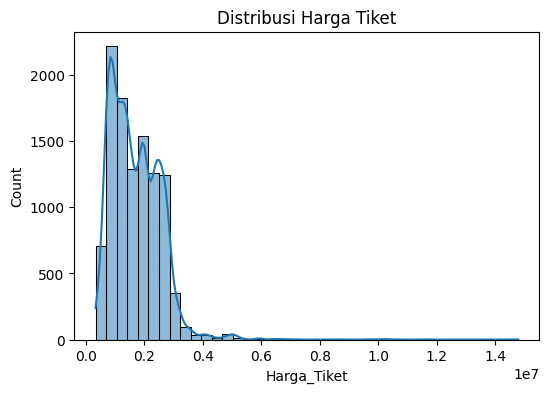

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(data["Harga_Tiket"], bins=40, kde=True)
plt.title("Distribusi Harga Tiket")
plt.show()

Distribusi harga tiket menunjukkan pola right-skewed, yang menandakan adanya variasi harga yang cukup besar, sesuai dengan karakteristik industri penerbangan.

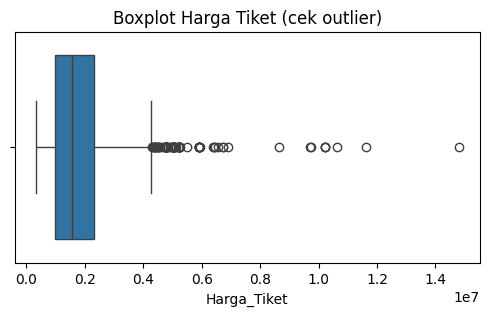

In [12]:
plt.figure(figsize=(6,3))
sns.boxplot(x=data["Harga_Tiket"])
plt.title("Boxplot Harga Tiket (cek outlier)")
plt.show()

## Harga Tiket vs Jumlah Transit
Analisis hubungan antara jumlah transit dan harga tiket dilakukan menggunakan boxplot.

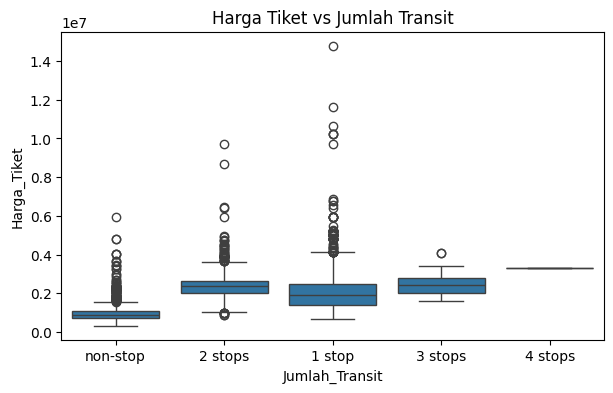

In [13]:
plt.figure(figsize=(7,4))
sns.boxplot(x="Jumlah_Transit", y="Harga_Tiket", data=data)
plt.title("Harga Tiket vs Jumlah Transit")
plt.show()

Visualisasi ini menunjukkan bahwa penerbangan dengan jumlah transit lebih banyak cenderung memiliki harga tiket yang lebih tinggi, sejalan dengan temuan pada penelitian Biswas et al. (2022).

## Harga Tiket vs Maskapai
Perbandingan harga tiket berdasarkan maskapai dilakukan untuk melihat perbedaan strategi harga antar maskapai.

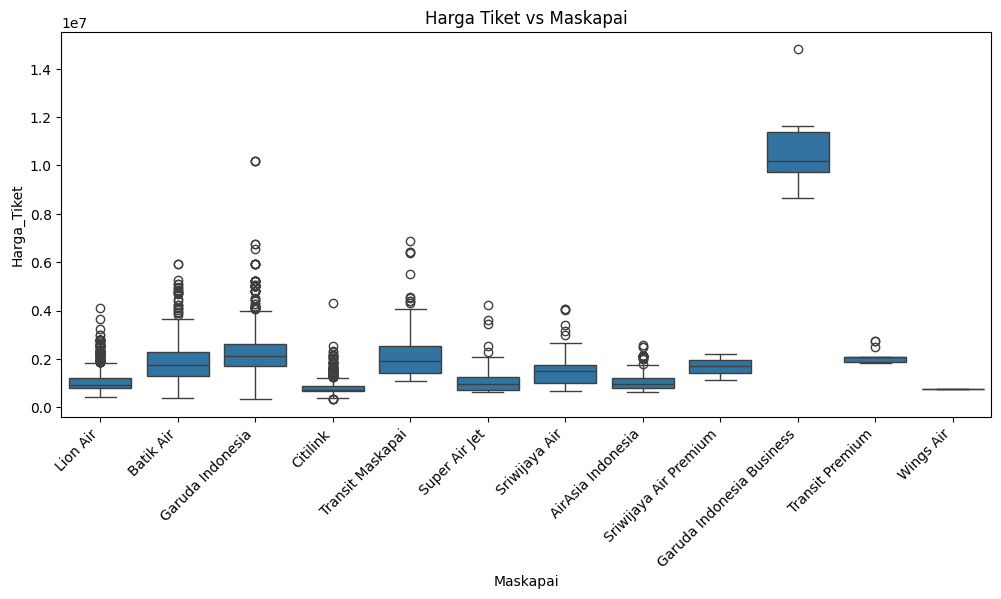

In [14]:
plt.figure(figsize=(12,5))
sns.boxplot(x="Maskapai", y="Harga_Tiket", data=data)
plt.xticks(rotation=45, ha="right")
plt.title("Harga Tiket vs Maskapai")
plt.show()

Hasil visualisasi menunjukkan adanya perbedaan distribusi harga antar maskapai, yang mengindikasikan bahwa atribut Maskapai merupakan fitur penting dalam pemodelan harga tiket.

Berdasarkan hasil Data Understanding ini, dapat disimpulkan bahwa dataset memiliki kualitas yang baik dan relevan untuk membangun model prediksi harga tiket pesawat. Namun, diperlukan proses Data Preparation lebih lanjut untuk mengubah atribut bertipe teks menjadi numerik, menangani nilai kosong, serta melakukan rekayasa fitur sebelum masuk ke tahap pemodelan.

<a id='Preparation'></a>
# Data Preparation
<hr>
Tahap Data Preparation bertujuan untuk mengubah data mentah menjadi data yang siap digunakan oleh algoritma machine learning. Proses ini meliputi pembersihan data, rekayasa fitur, dan penyusunan pipeline preprocessing agar proses pelatihan serta prediksi konsisten.

In [15]:
df = data.copy()

In [16]:
before = data.shape
print('Sebelum drop duplicates:', before)
df = df.drop_duplicates().reset_index(drop=True)
after = df.shape
print('Sesudah drop duplicates:', after)

Sebelum drop duplicates: (10683, 9)
Sesudah drop duplicates: (10463, 9)


In [17]:
X = df.drop(columns=["Harga_Tiket"])
y = df["Harga_Tiket"]

In [18]:
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        dt = pd.to_datetime(X["Tanggal_Perjalanan"], dayfirst=True, errors="coerce")
        X["travel_day"] = dt.dt.day
        X["travel_month"] = dt.dt.month
        X["travel_weekday"] = dt.dt.weekday

        dep = X["Waktu_Berangkat"].astype(str).str.extract(r'(\d{1,2}):(\d{2})')
        X["dep_hour"] = pd.to_numeric(dep[0], errors="coerce")
        X["dep_min"]  = pd.to_numeric(dep[1], errors="coerce")

        arr = X["Waktu_Tiba"].astype(str).str.extract(r'(\d{1,2}):(\d{2})')
        X["arr_hour"] = pd.to_numeric(arr[0], errors="coerce")
        X["arr_min"]  = pd.to_numeric(arr[1], errors="coerce")

        dur = X["Durasi_Penerbangan"].astype(str).str.lower()
        h = dur.str.extract(r'(\d+)\s*h')[0]
        m = dur.str.extract(r'(\d+)\s*m')[0]
        X["dur_min"] = pd.to_numeric(h, errors="coerce").fillna(0)*60 + pd.to_numeric(m, errors="coerce").fillna(0)

        jt = X["Jumlah_Transit"].astype(str).str.lower()
        X["transit_count"] = np.where(
            jt.str.contains("non", na=False), 0,
            pd.to_numeric(jt.str.extract(r'(\d+)')[0], errors="coerce")
        )

        dep_total = X["dep_hour"]*60 + X["dep_min"]
        X["day_change"] = np.floor_divide(dep_total + X["dur_min"], 1440)

        keep = [
            "Maskapai","Informasi_Tambahan","Jarak_Km",
            "travel_day","travel_month","travel_weekday",
            "dep_hour","dep_min","arr_hour","arr_min",
            "dur_min","transit_count","day_change"
        ]
        return X[keep]

In [19]:
fe = FeatureEngineer()
display(fe.transform(X.head()))

,Maskapai,Informasi_Tambahan,Jarak_Km,travel_day,travel_month,travel_weekday,dep_hour,dep_min,arr_hour,arr_min,dur_min,transit_count,day_change
0,Lion Air,No info,1739.802102,24,3,6,22,20,1,10,170.0,0.0,1.0
1,Batik Air,No info,1560.696623,1,5,2,5,50,13,15,445.0,2.0,0.0
2,Garuda Indonesia,No info,2089.267638,9,6,6,9,25,4,25,1140.0,2.0,1.0
3,Lion Air,No info,1560.696623,12,5,6,18,5,23,30,325.0,1.0,0.0
4,Lion Air,No info,1739.802102,1,3,4,16,50,21,35,285.0,1.0,0.0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (8370, 8) Test: (2093, 8)


In [21]:
numeric_features = [
    "Jarak_Km","travel_day","travel_month","travel_weekday",
    "dep_hour","dep_min","arr_hour","arr_min",
    "dur_min","transit_count","day_change"
]
categorical_features = ["Maskapai","Informasi_Tambahan"]

In [22]:
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [23]:
categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [24]:
preprocess = Pipeline(steps=[
    ("feat", FeatureEngineer()),
    ("ct", ColumnTransformer(
        transformers=[
            ("num", numeric_pipe, numeric_features),
            ("cat", categorical_pipe, categorical_features)
        ]
    ))
])

<a id='Modelling'></a>
# Modelling
<hr>
Tahap Modelling bertujuan membangun model prediksi harga tiket pesawat menggunakan algoritma Linear Regression.

In [25]:
lr_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)

<a id='Evaluation'></a>
# Evaluation Model
<hr>
Evaluasi model dilakukan untuk mengukur performa prediksi menggunakan beberapa metrik evaluasi regresi, yaitu:

* Mean Absolute Error (MAE)
* Root Mean Squared Error (RMSE)
* R-Squared (R²)

In [26]:
mae  = mean_absolute_error(y_test, pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, pred_lr))
r2   = r2_score(y_test, pred_lr)

print("Hasil Evaluasi Linear Regression")
print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)

Hasil Evaluasi Linear Regression
MAE : 329059.64915472746
RMSE: 490341.0278432749
R2  : 0.6672701947834521


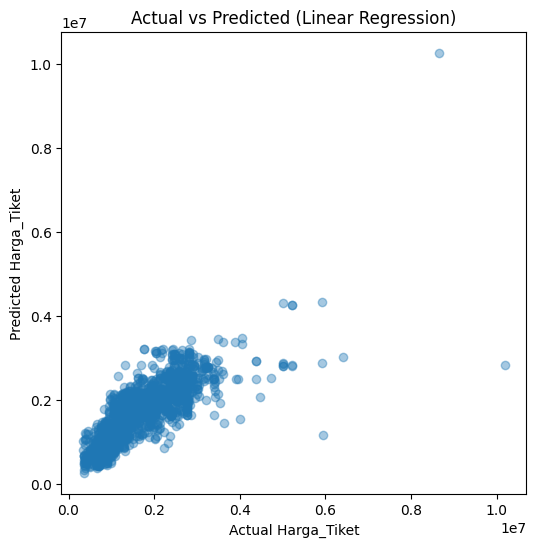

In [27]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred_lr, alpha=0.4)
plt.xlabel("Actual Harga_Tiket")
plt.ylabel("Predicted Harga_Tiket")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

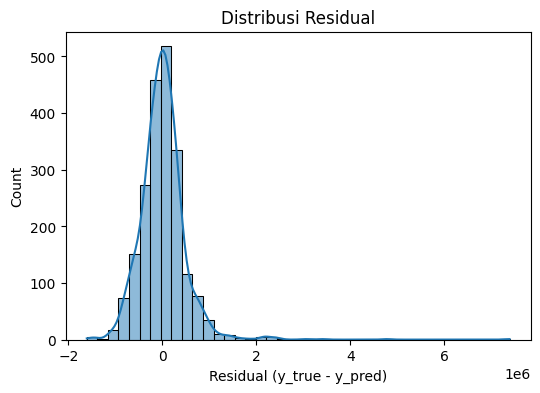

In [28]:
residuals = y_test - pred_lr
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=40, kde=True)
plt.title("Distribusi Residual")
plt.xlabel("Residual (y_true - y_pred)")
plt.show()

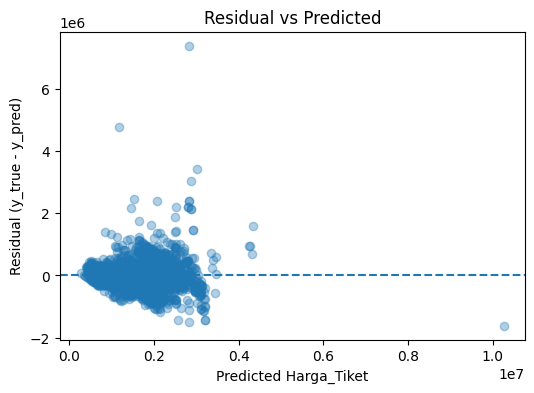

In [29]:
plt.figure(figsize=(6,4))
plt.scatter(pred_lr, residuals, alpha=0.35)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted Harga_Tiket")
plt.ylabel("Residual (y_true - y_pred)")
plt.title("Residual vs Predicted")
plt.show()

<a id='Deployment'></a>
# Deployment
<hr>
Tahap Deployment bertujuan untuk menyimpan dan mengimplementasikan model agar dapat digunakan kembali pada data baru atau diintegrasikan ke dalam aplikasi lain seperti Streamlit.

## Penyimpanan Model dan Scaler

In [30]:
joblib.dump(lr_model, "model_linear_regression.joblib")
print("Model saved")

Model saved


## Load Model & Contoh Prediksi

In [31]:
loaded = joblib.load("model_linear_regression.joblib")
print("Contoh prediksi:", loaded.predict(X_test.iloc[:3]))

Contoh prediksi: [2041852.74007267 2166186.17306682  749202.98913349]


In [32]:
data_baru = pd.DataFrame([{
    "Maskapai": "Lion Air",
    "Tanggal_Perjalanan": "24/03/2019",
    "Waktu_Berangkat": "22:20",
    "Waktu_Tiba": "01:10 22 Mar",
    "Durasi_Penerbangan": "2h 50m",
    "Jumlah_Transit": "non-stop",
    "Informasi_Tambahan": "No info",
    "Jarak_Km": 1739.802102
}])

print("Prediksi Harga Tiket:", loaded.predict(data_baru)[0])

Prediksi Harga Tiket: 1014062.0209287577


Model telah siap digunakan untuk prediksi harga tiket pesawat pada data baru maupun dikembangkan menjadi aplikasi berbasis web menggunakan Streamlit.

# Sumber dan Referensi

- Biswas et al. (2022). Flight Price Prediction: A Case Study (https://www.academia.edu/download/88045346/Flight_Price_Prediction_A_Case_Study.pdf).
- Verma, Pranav (2022). Flight Price Prediction (http://www.ir.juit.ac.in:8080/jspui/bitstream/123456789/3645/1/Flight%20Price%20Prediction.pdf).
- Dataset Flight Price Prediction (https://www.kaggle.com/datasets/muhammadbinimran/flight-price-prediction).
- Scikit-learn Documentation (https://scikit-learn.org/stable/)


---


Copyright © 2025 by Pengelola MK Praktikum Unggulan (Praktikum DGX), Universitas Gunadarma


https://www.praktikum-hpc.gunadarma.ac.id/ <br>
https://www.hpc-hub.gunadarma.ac.id/ <br>